In [32]:
import pandas as pd

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

In [34]:
rates = pd.read_csv("cleaned/rates.csv")

rates

,jurisdiction,slug,country,location,season,total,mealsAndIncidentals
0,Canada,albania-tirana,Albania,Tirana,NaN,41.59,nan
1,Canada,albania,Albania,Other,NaN,33.27,nan
2,Canada,algeria-algiers,Algeria,Algiers,NaN,133.08,nan
3,Canada,algeria,Algeria,Other,NaN,106.46,nan
4,Canada,angola-luanda,Angola,Luanda,NaN,260.13,nan
5,Canada,angola,Angola,Other,NaN,208.10,nan
6,Canada,anguilla-the-valley,Anguilla,The Valley,NaN,174.44,nan
7,Canada,antigua-and-barbuda-st.-john's,Antigua and Barbuda,St. John's,NaN,226.45,nan
8,Canada,argentina-buenos-aires,Argentina,Buenos Aires,NaN,79.46,nan
9,Canada,argentina,Argentina,Other,NaN,63.57,nan


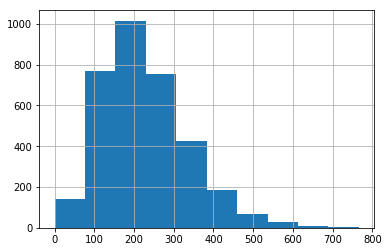

In [35]:
rates['total'].hist()

In [36]:
capitals = pd.read_csv("cleaned/capitals.csv")

capitals

,Short-form name,Long-form name,GENC 2A Code (see Note 2),GENC 3A Code (see Note 2),Capital,slug
0,Afghanistan *+,Islamic Republic of Afghanistan,AF,AFG,Kabul,afghanistan-kabul
1,Albania *+,Republic of Albania,AL,ALB,Tirana,albania-tirana
2,Algeria *+,People's Democratic Republic of Algeria,DZ,DZA,Algiers,algeria-algiers
3,Andorra *+,Principality of Andorra,AD,AND,Andorra la Vella,andorra-andorra-la-vella
4,Angola *+,Republic of Angola,AO,AGO,Luanda,angola-luanda
5,Antigua and\nBarbuda *+,Antigua and Barbuda,AG,ATG,Saint John's,antigua-and-barbuda-saint-john's
6,Argentina *+,Argentine Republic,AR,ARG,Buenos Aires,argentina-buenos-aires
7,Armenia *+,Republic of Armenia,AM,ARM,Yerevan,armenia-yerevan
8,Australia *+,Commonwealth of Australia,AU,AUS,Canberra,australia-canberra
9,Austria *+,Republic of Austria,AT,AUT,Vienna,austria-vienna


In [37]:
rates = rates.loc[rates.groupby(['jurisdiction','slug'])['total'].idxmin(skipna=False)]

In [38]:
capitals['slug'] = capitals['slug'].replace({
    'benin-porto-novo': 'benin-cotonou',
    'chad-n\'djamena': 'chad-ndjamena',
    'congo-kinshasa': 'democratic-republic-of-the-congo-kinshasa',
    'czechia-prague': 'czech-republic-prague',
    '!-eswatini-mbabane-lobamba': 'swaziland-mbabane',
    'holy-see-vatican-city': 'holy-see',
    'monaco-monaco': 'monaco',
    'singapore-singapore': 'singapore',
    'tonga-nuku\'alofa': 'tonga-nukualofa',
    'israel-jerusalem': 'jerusalem',
    'cabo-verde-praia': 'cape-verde-praia'
})

rates['slug'] = rates['slug'].replace({
    'republic-of-the-congo-brazzaville': 'congo-brazzaville',
    'congo-democratic-republic-of-kinshasa': 'democratic-republic-of-the-congo-kinshasa',
    'congo-dem.-rep.-kinshasa': 'democratic-republic-of-the-congo-kinshasa',
    'occupied-territories-jerusalem': 'jerusalem',
    'israel-jerusalem': 'jerusalem',
    'japan-tokyo-city': 'japan-tokyo',
    'mexico-mexico-city-d.f.': 'mexico-mexico-city',
    'australia-canberra-melbourne-and-sydney': 'australia-canberra',
    'cabo-verde-praia': 'cape-verde-praia',
    'central-african-rep.-bangui': 'central-african-republic-bangui',
    'chad-n\'djamena': 'chad-ndjamena',
    'cote-d-ivoire-yamoussokro': 'cote-d\'ivoire-yamoussoukro',
    'croatia-republic-of-zagreb': 'croatia-zagreb',
    'gambia-banjul': 'gambia-the-banjul',
    'gambia-(the)-banjul': 'gambia-the-banjul',
    'georgia-republic-of-tbilisi': 'georgia-tbilisi',
    'korea-(republic-of)-seoul': 'korea-south-seoul',
    'korea-republic-of-seoul': 'korea-south-seoul',
    'serbia-pristina': 'kosovo-pristina',
    'lao-peo.-dem.-rep.-vientiane': 'laos-vientiane',
    'macedonia-(formerly-yugoslav-republic-of-macedonia)-skopje': 'macedonia-skopje',
    'the-former-yugoslav-republic-of-macedonia-skopje': 'macedonia-skopje',
    'russian-federation-moscow': 'russia-moscow',
    'new-zealand-auckland-and-wellington': 'new-zealand-wellington',
    'philippines-metro-manila': 'philippines-manila',
    'slovakia-bratislava': 'slovak-republic-bratislava',
    'south-sudan-republic-of-juba': 'south-sudan-juba',
    'syrian-arab-republic-damascus': 'syria-damascus',
    'tanzania-united-rep.-of-dar-es-salaam': 'tanzania-dar-es-salaam',
    'tonga-nuku\'alofa': 'tonga-nukualofa',
    'tonga-nuku-alofa': 'tonga-nukualofa',
    'yemen-sana\'a': 'yemen-sanaa',
    'yemen-republic-of-sana\'a': 'yemen-sanaa',
    'kyrgyz-republic-bishkek': 'kyrgyzstan-bishkek',
    'united-kingdom-(includes-northern-ireland)-london': 'united-kingdom-london',
    'timor-leste-(formerly-east-timor)-dili': 'timor-leste-dili',
    'monaco-monte-carlo': 'monaco',
    'canada-ottawa-ontario': 'canada-ottawa',
    'italy-rome-and-naples': 'italy-rome',
    'surinam-paramaribo': 'suriname-paramaribo',
    'switzerland-berne': 'switzerland-bern'
})

In [39]:
us_rates = rates[rates['jurisdiction'] == 'US']

us_rates = us_rates[~us_rates['country'].isin(['AFGHANISTAN','ANTARCTICA','IRAQ','LIBYA','SOMALIA'])].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

capitals[~capitals['slug'].isin(us_rates['slug'])]['slug']

0                               afghanistan-kabul
3                        andorra-andorra-la-vella
5                antigua-and-barbuda-saint-john's
14                            barbados-bridgetown
19                                 bhutan-thimphu
48                              djibouti-djibouti
49                                dominica-roseau
57                              swaziland-mbabane
68                         grenada-saint-george's
81                                   iraq-baghdad
90                                kiribati-tarawa
91                          korea-north-pyongyang
101                                 libya-tripoli
102                           liechtenstein-vaduz
104                         luxembourg-luxembourg
109                                 maldives-male
111                                malta-valletta
114                          mauritius-port-louis
116        micronesia-federated-states-of-palikir
124                          nauru-yaren-district


In [40]:
un_rates = rates[rates['jurisdiction'] == 'UN'].copy()

us_rates.merge(un_rates, on='slug', how='inner').reset_index()

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y
0,0,0,US,albania-tirana,ALBANIA,Tirana,S1,287.00,97.00,UN,Albania,Tirana,NaN,147.00,nan
1,1,1,US,algeria-algiers,ALGERIA,Algiers,S1,255.00,75.00,UN,Algeria,Algiers,NaN,258.00,nan
2,2,2,US,angola-luanda,ANGOLA,Luanda,S1,575.00,170.00,UN,Angola,Luanda,NaN,230.00,nan
3,3,3,US,argentina-buenos-aires,ARGENTINA,Buenos Aires,S1,396.00,129.00,UN,Argentina,Buenos Aires,NaN,229.00,nan
4,4,4,US,armenia-yerevan,ARMENIA,Yerevan,S1,240.00,92.00,UN,Armenia,Yerevan,NaN,158.00,nan
5,5,5,US,australia-canberra,AUSTRALIA,Canberra,S1,296.00,131.00,UN,Australia,"Canberra, Melbourne & Sydney",NaN,336.00,nan
6,6,7,US,azerbaijan-baku,AZERBAIJAN,Baku,S1,361.00,115.00,UN,Azerbaijan,Baku,NaN,179.00,nan
7,7,9,US,bahrain-manama,BAHRAIN,MANAMA,S1,377.00,122.00,UN,Bahrain,Manama,NaN,280.00,nan
8,8,10,US,bangladesh-dhaka,BANGLADESH,Dhaka,S1,290.00,90.00,UN,Bangladesh,Dhaka,NaN,133.00,nan
9,9,11,US,belarus-minsk,BELARUS,Minsk,S1,274.00,84.00,UN,Belarus,Minsk,NaN,249.00,nan


In [41]:
us_rates = rates[rates['jurisdiction'] == 'US']

us_rates = us_rates[~us_rates['country'].isin(['AFGHANISTAN','ANTARCTICA','IRAQ','LIBYA','SOMALIA'])].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

eu_rates = rates[rates['jurisdiction'] == 'EU'].copy()

other_rates = rates[~rates['jurisdiction'].isin(['US','EU'])].copy()

us_vs_other_rates = us_rates.merge(other_rates, on='slug', how='inner').reset_index()

eu_rates['country'] = eu_rates['country'].str.upper()

us_vs_eu_rates = us_rates.merge(eu_rates, on='country', how='inner').reset_index()

us_vs_other_rates = pd.concat([us_vs_other_rates,us_vs_eu_rates], ignore_index=True)

us_vs_other_rates

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,97.00,nan,S1,NaN,albania-tirana,NaN,NaN,287.00,41.59
1,NaN,ALBANIA,ALBANIA,0,US,UK,1,Tirana,Tirana,97.00,nan,S1,NaN,albania-tirana,NaN,NaN,287.00,219.04
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,97.00,nan,S1,NaN,albania-tirana,NaN,NaN,287.00,147.00
3,NaN,ALGERIA,Algeria,1,US,Canada,3,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,133.08
4,NaN,ALGERIA,ALGERIA,1,US,UK,4,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,280.73
5,NaN,ALGERIA,Algeria,1,US,UN,5,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,258.00
6,NaN,ANGOLA,Angola,2,US,Canada,6,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,260.13
7,NaN,ANGOLA,ANGOLA,2,US,UK,7,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,486.85
8,NaN,ANGOLA,Angola,2,US,UN,8,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,230.00
9,NaN,ARGENTINA,Argentina,3,US,Canada,9,Buenos Aires,Buenos Aires,129.00,nan,S1,NaN,argentina-buenos-aires,NaN,NaN,396.00,79.46


In [42]:
us_vs_other_rates['diff'] = (us_vs_other_rates['total_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']

us_vs_other_rates.loc[us_vs_other_rates['jurisdiction_y'] == 'Canada','diff'] = (us_vs_other_rates['mealsAndIncidentals_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']


In [43]:
us_rates[~us_rates['slug'].isin(rates[rates['jurisdiction'] == 'UN']['slug'])]['slug']

6                         austria-vienna
8                     bahamas-the-nassau
12                      belgium-brussels
13                       belize-belmopan
19            brunei-bandar-seri-begawan
22                         burma-rangoon
41                    denmark-copenhagen
64                              holy-see
67                     iceland-reykjavik
71                        ireland-dublin
105                netherlands-amsterdam
110                          norway-oslo
131                   slovenia-ljubljana
139                     switzerland-bern
147    trinidad-and-tobago-port-of-spain
Name: slug, dtype: object

In [44]:
us_rates[~us_rates['slug'].isin(rates[rates['jurisdiction'] == 'Canada']['slug'])]['slug']

8             bahamas-the-nassau
13               belize-belmopan
19    brunei-bandar-seri-begawan
22                 burma-rangoon
27                 canada-ottawa
33                comoros-moroni
35    cote-d'ivoire-yamoussoukro
46      equatorial-guinea-malabo
64                      holy-see
75                     jerusalem
Name: slug, dtype: object

In [45]:
us_rates[~us_rates['slug'].isin(rates[rates['jurisdiction'] == 'UK']['slug'])]['slug']

8                             bahamas-the-nassau
9                                 bahrain-manama
14                                 benin-cotonou
16               bosnia-and-herzegovina-sarajevo
21                      burkina-faso-ouagadougou
22                                 burma-rangoon
24                              cape-verde-praia
28               central-african-republic-bangui
29                                 chad-ndjamena
33                                comoros-moroni
35                    cote-d'ivoire-yamoussoukro
40     democratic-republic-of-the-congo-kinshasa
53                              gabon-libreville
60                          guinea-bissau-bissau
64                                      holy-see
79                             korea-south-seoul
81                            kuwait-kuwait-city
85                                lebanon-beirut
86                                lesotho-maseru
87                              liberia-monrovia
88                  

In [46]:
us_vs_other_rates['diff'].describe()

count     578.00
mean       21.74
std       404.24
min        -0.51
25%         0.03
50%         0.28
75%         0.57
max     9,190.61
Name: diff, dtype: float64

In [47]:
us_vs_other_rates[us_vs_other_rates['diff'] < -10]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff


In [48]:
us_vs_other_rates[us_vs_other_rates['diff'] > 0.9]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,97.00,nan,S1,NaN,albania-tirana,NaN,NaN,287.00,41.59,1.33
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,97.00,nan,S1,NaN,albania-tirana,NaN,NaN,287.00,147.00,0.95
8,NaN,ANGOLA,Angola,2,US,UN,8,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,230.00,1.50
21,NaN,AZERBAIJAN,AZERBAIJAN,7,US,UK,21,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,164.76,1.19
22,NaN,AZERBAIJAN,Azerbaijan,7,US,UN,22,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,179.00,1.02
27,NaN,BANGLADESH,Bangladesh,10,US,UN,27,Dhaka,Dhaka,90.00,nan,S1,NaN,bangladesh-dhaka,NaN,NaN,290.00,133.00,1.18
28,NaN,BELARUS,Belarus,11,US,Canada,28,Minsk,Minsk,84.00,nan,S1,NaN,belarus-minsk,NaN,NaN,274.00,0.01,"9,190.61"
33,NaN,BELIZE,BELIZE,13,US,UK,33,Belmopan,Belmopan,93.00,nan,S1,NaN,belize-belmopan,NaN,NaN,242.00,117.19,1.06
45,NaN,BRAZIL,BRAZIL,18,US,UK,45,Brasilia,Brasilia,120.00,nan,S1,NaN,brazil-brasilia,NaN,NaN,339.00,158.54,1.14
46,NaN,BRAZIL,Brazil,18,US,UN,46,Brasilia,Brasilia,120.00,nan,S1,NaN,brazil-brasilia,NaN,NaN,339.00,151.00,1.25


In [49]:
us_vs_other_rates.loc[us_vs_other_rates['slug'].isnull(),'slug'] = us_vs_other_rates['slug_y']

us_vs_other_rates = us_vs_other_rates[us_vs_other_rates['diff'] < 1000]

min_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].min()).reset_index()

min_diff.groupby('jurisdiction_y').describe()

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         151.00 0.03 0.35 -0.51 -0.19 -0.06 0.17 2.03
EU             146.00 0.54 0.34 -0.23  0.35  0.47 0.71 1.74
UK             131.00 0.40 0.42 -0.47  0.12  0.29 0.57 2.22
UN             148.00 0.42 0.57 -0.37  0.07  0.28 0.61 3.88

In [50]:
max_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].max()).reset_index()

stats = pd.DataFrame(max_diff.groupby('jurisdiction_y').describe())

stats

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         151.00 0.03 0.35 -0.51 -0.19 -0.06 0.17 2.03
EU             146.00 0.54 0.34 -0.23  0.35  0.47 0.71 1.74
UK             131.00 0.40 0.42 -0.47  0.12  0.29 0.57 2.22
UN             148.00 0.42 0.57 -0.37  0.07  0.28 0.61 3.88

In [51]:
us_vs_other_rates.sample(n=3)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
116,NaN,ERITREA,Eritrea,47,US,UN,116,Asmara,Asmara,108.00,nan,S1,NaN,eritrea-asmara,NaN,NaN,243.00,215.00,0.13
316,NaN,REPUBLIC OF THE CONGO,Congo,121,US,UN,316,Brazzaville,Brazzaville,119.00,nan,S1,NaN,congo-brazzaville,NaN,NaN,406.00,271.00,0.50
275,NaN,NEW ZEALAND,NEW ZEALAND,106,US,UK,275,Wellington,Wellington,123.00,nan,S1,NaN,new-zealand-wellington,NaN,NaN,309.00,276.39,0.12


In [52]:
us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada'].sample(n=1)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
120,NaN,ETHIOPIA,Ethiopia,49,US,Canada,120,Addis Ababa,Addis Ababa,85.00,nan,S1,NaN,ethiopia-addis-ababa,NaN,NaN,400.00,78.31,0.09


In [53]:
us_vs_other_rates.to_csv('results.csv')

In [54]:
for index, row in stats.iterrows():
    print('Comparing rates for',round(row['diff']['count']),'cities, the US has a',round(row['diff']['50%']*100,1),'% higher/lower median rate and a',round(row['diff']['mean']*100,1),'% higher/lower average rate than',index)

Comparing rates for 151.0 cities, the US has a -5.7 % higher/lower median rate and a 2.8 % higher/lower average rate than Canada
Comparing rates for 146.0 cities, the US has a 47.1 % higher/lower median rate and a 53.6 % higher/lower average rate than EU
Comparing rates for 131.0 cities, the US has a 29.1 % higher/lower median rate and a 39.7 % higher/lower average rate than UK
Comparing rates for 148.0 cities, the US has a 28.4 % higher/lower median rate and a 42.3 % higher/lower average rate than UN


In [55]:
pd.DataFrame(us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['mealsAndIncidentals_x'] > us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['total_y'],columns=['higher']).groupby(['higher']).size()

higher
False    87
True     64
dtype: int64